In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os
import math
import random

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)


Python version: 3.11.11
Tensorflow version: 2.17.1
Keras version: 3.5.0


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/Colab Notebooks/kowsar/project/dataset.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/kowsar/project/dataset.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
   creating: test/
   creating: test/Paper/
 extracting: test/Paper/photo_10_2025-01-27_15-59-49_jpg.rf.f8fb70776e44dac86026e93ff127ab06.jpg  
 extracting: test/Paper/photo_11_2025-01-27_16-37-58_jpg.rf.11b83f60d9681a09b58c44856ab71841.jpg  
 extracting: test/Paper/photo_2025-01-24_19-52-47_jpg.rf.9afb3f19ce648f4d8bdcbdf3e8361ddd.jpg  
 extracting: test/Paper/photo_2025-01-24_20-00-48_jpg.rf.c73f16ef21139f8ee2fb7f4f3d004413.jpg  
 extracting: test/Paper/photo_2025-01-24_20-01-03_jpg.rf.411b99426583a95641d7d89bac9552c4.jpg  
 extracting: test/Paper/photo_2025-01-24_20-47-19_jpg.rf.44be6106da2520d3d1595c54f6b02a51.jpg  
 extracting: test/Paper/photo_2025-01-24_20-47-35_jpg.rf.98c8b27ecf15ba778d9930a6349b6d33.jpg  
 extracting: test/Paper/photo_2025-01-24_20-49-11_jpg.rf.63c542cad23970a93ecb0dc7f38aad18.jpg  
 extracting: test/Paper/photo_

In [5]:
# dataset_path = "/content/drive/MyDrive/Colab Notebooks/kowsar/project/dataset.zip"

# DATASET_PATH = "/content/drive/My Drive/RockPaperScissors/dataset"


In [4]:
TRAIN_DIR = "train"
TEST_DIR = "test"
VALID_DIR = "valid"

In [5]:
# Function to preprocess dataset
def preprocess_dataset(directory, img_size):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        labels="inferred",
        label_mode="int",
        image_size=(img_size, img_size),
        batch_size=32,
        shuffle=True
    )
    return dataset.map(lambda x, y: (x / 255.0, y))  # Normalize images to [0, 1]

# Input image size
INPUT_IMG_SIZE = 150  # You can adjust this size as needed

In [6]:
dataset_train = preprocess_dataset(TRAIN_DIR, INPUT_IMG_SIZE)
dataset_test = preprocess_dataset(TEST_DIR, INPUT_IMG_SIZE)
dataset_valid = preprocess_dataset(VALID_DIR, INPUT_IMG_SIZE)

Found 1195 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 113 files belonging to 3 classes.


In [7]:
NUM_TRAIN_EXAMPLES = 1195
NUM_TEST_EXAMPLES = 66

In [8]:
# Dataset info
class_names = ["paper", "rock", "scissors"]
NUM_CLASSES = len(class_names)

print(f"Class names: {class_names}")
print(f"Number of classes: {NUM_CLASSES}\n")

Class names: ['paper', 'rock', 'scissors']
Number of classes: 3



Image batch shape: (32, 150, 150, 3)
Label batch shape: (32,)
First image shape: (150, 150, 3)


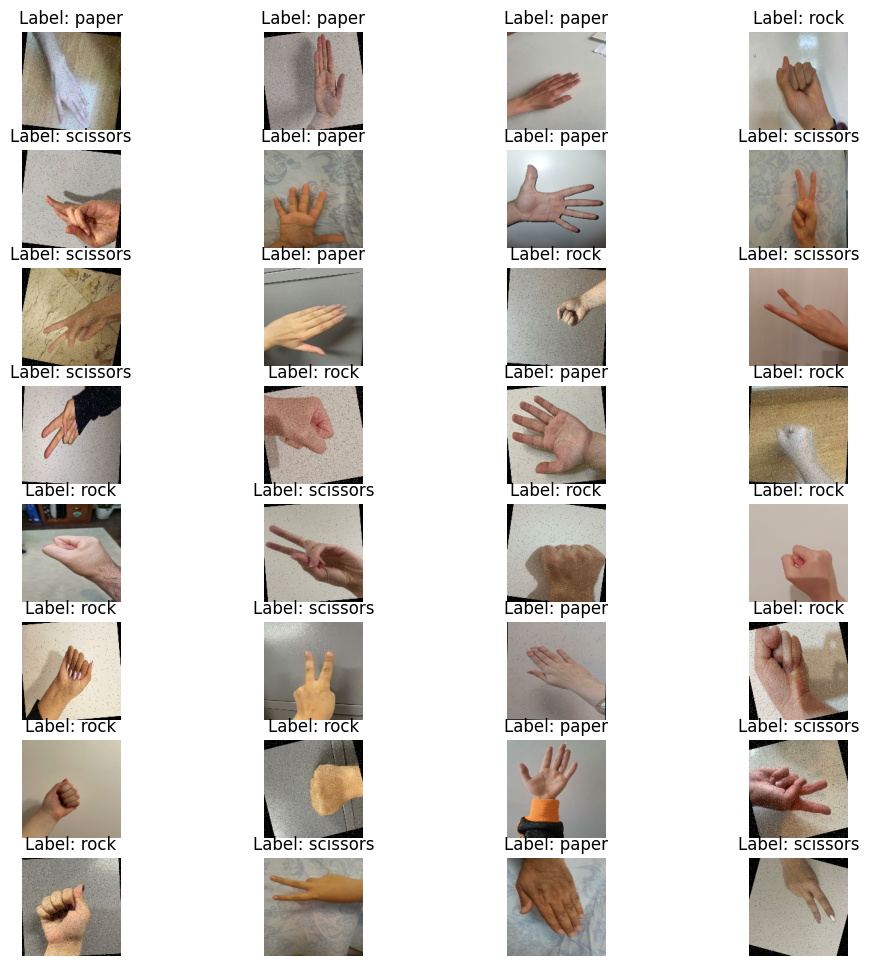

In [9]:
# Preview dataset function
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for images, labels in dataset.take(1):
        labels = [2 if label == 3 else label for label in labels]
        for i in range(len(images)):
            plt.subplot(8, 4, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f"Label: {class_names[labels[i].numpy()]}")
            plt.axis("off")

# Preview training dataset
preview_dataset(dataset_train)

# Check a batch
for images, labels in dataset_train.take(1):
    print(f"Image batch shape: {images.shape}")
    print(f"Label batch shape: {labels.shape}")
    print(f"First image shape: {images[0].shape}")
    break


In [10]:
def format_example(image, label):
    # Convert image values to float and normalize to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    # Resize image to (INPUT_IMG_SIZE, INPUT_IMG_SIZE)
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    # Adjust label if necessary
    if label == 3:
        label = 2
    return image, label

In [11]:
dataset_train2 = dataset_train.map(format_example)
dataset_test2 = dataset_test.map(format_example)

In [12]:
# Class names for the labels
class_names = ['paper', 'rock', 'scissors']

# Explore what values are used to represent the image
(first_image, first_label) = list(dataset_train.take(1))[0]

# Print image details
print('Label (numeric):', first_label.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')

# Get the label name from the numeric label
label_index = int(first_label.numpy()[0])  # Access the first element in the tensor
label_name = class_names[label_index]  # Convert numeric label to class name

# Print the label name
print(f"Label (name): {label_name}\n")

# Print the image as an array
print(first_image.numpy())

Label (numeric): [2 2 2 1 1 0 1 0 0 1 0 1 1 2 0 1 1 2 0 0 1 2 0 0 0 1 0 1 2 0 1 2] 

Image shape: (32, 150, 150, 3) 

Label (name): scissors

[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.01568628 0.01568628 0.01568628]
   [0.01176471 0.01176471 0.01176471]
   [0.01862745 0.01862745 0.01862745]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.  

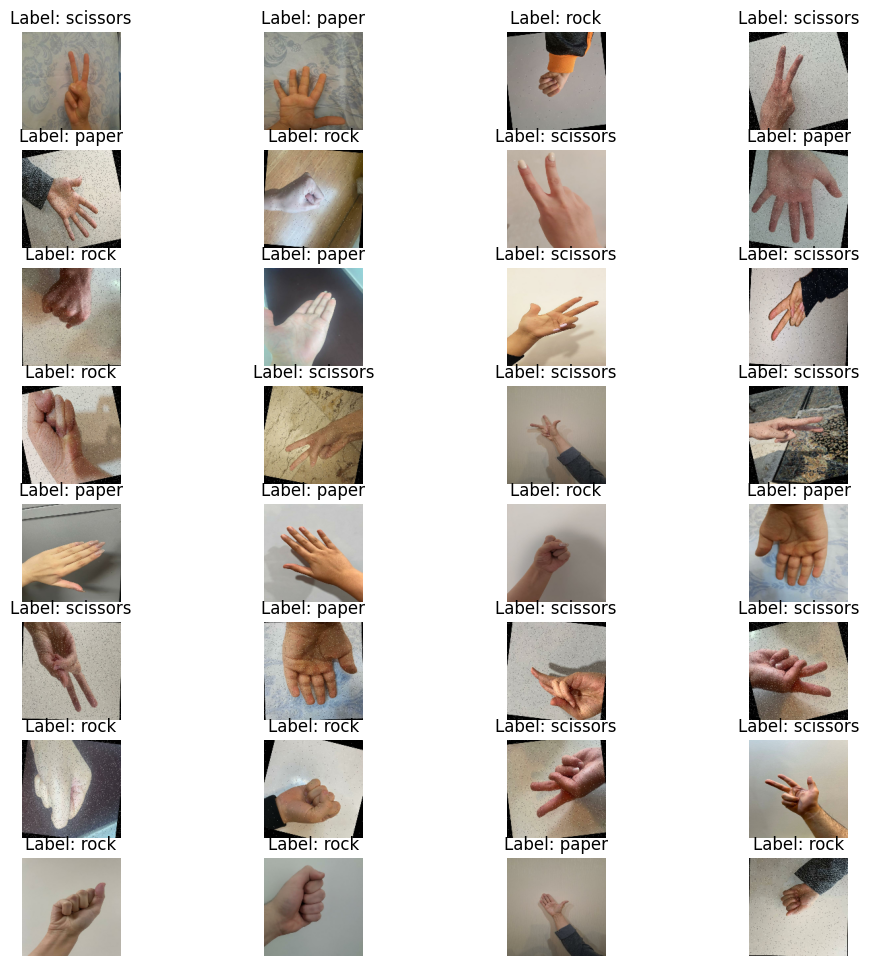

In [13]:
# Explore preprocessed training dataset images.
preview_dataset(dataset_train)

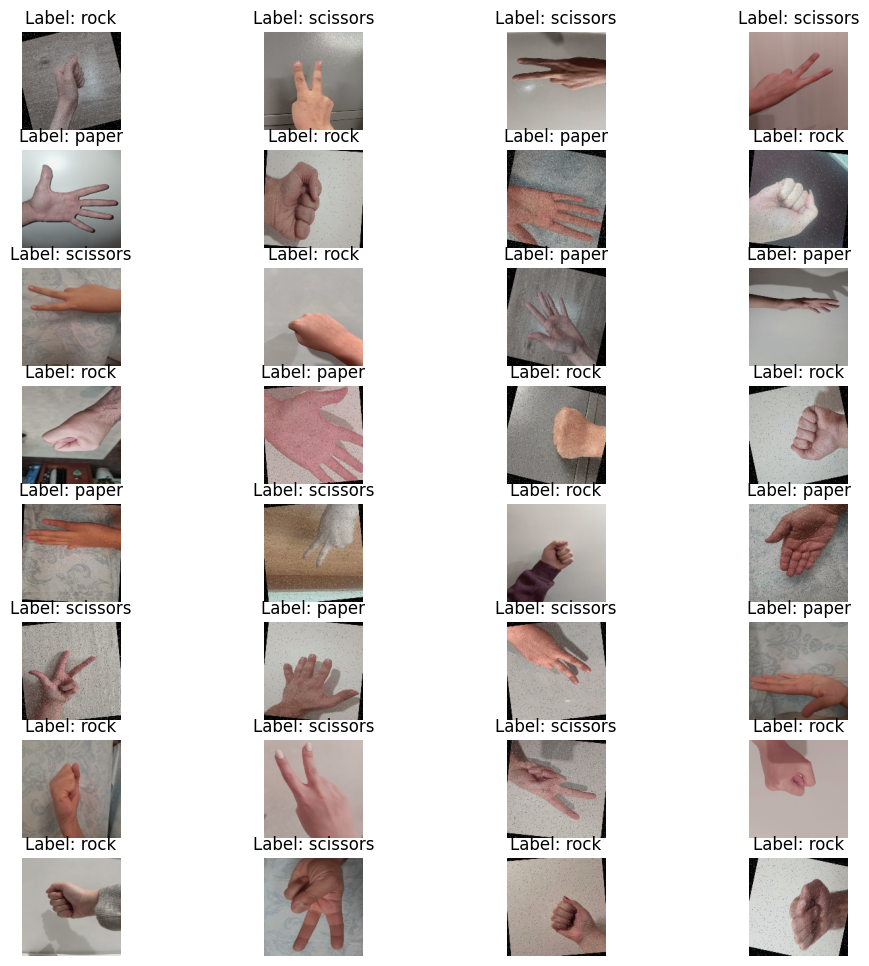

In [15]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

def augment_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_hue(image, max_delta=0.08)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image

def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

def augment_inversion(image: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    return image

def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    # Get dynamic shape of the image.
    image_shape = tf.shape(image)
    image_height = image_shape[0]
    image_width = image_shape[1]
    image_colors = image_shape[2]

    crop_size = (image_width, image_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Ensure we don't remove batch dimension in this case
        crops = tf.image.crop_and_resize(
            img,
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

def augment_data(image, label):
    image = augment_flip(image)
    image = augment_color(image)
    image = augment_rotation(image)
    image = augment_zoom(image)
    image = augment_inversion(image)
    return image, label

dataset_train_augmented = dataset_train.map(augment_data)
preview_dataset(dataset_train_augmented)


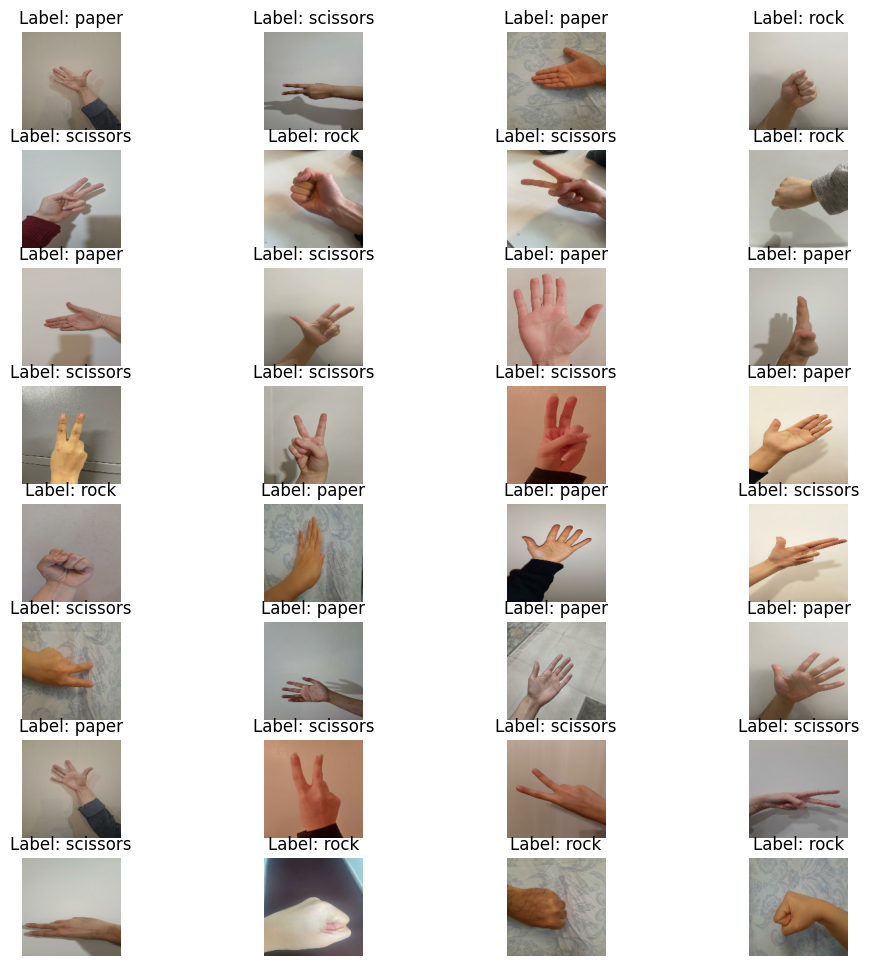

In [16]:
# Explore test dataset.
preview_dataset(dataset_test)

In [17]:
NUM_CLASSES = 3

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

BATCH_SIZE = 32

dataset_train_augmented_shuffled = dataset_train_augmented.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_augmented_shuffled = dataset_train_augmented.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_augmented_shuffled = dataset_train_augmented_shuffled.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

print(dataset_train_augmented_shuffled)
print(dataset_test_shuffled)

Number of TRAIN examples: 1195
Number of TEST examples: 66
Number of label classes: 3
<_PrefetchDataset element_spec=(TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int32, name=None))>


Label batch shape: (32,) 

Image batch shape: (32, 150, 150, 3) 

Label batch: [2 1 0 0 1 0 1 0 1 0 1 0 2 1 1 0 2 2 0 1 0 1 2 2 0 1 1 2 2 2 0 2] 

First batch image: [[[0.99205834 0.99673486 0.9974119 ]
  [0.7890762  0.7937527  0.7944298 ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.9986365  1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.77404046 0.778717   0.77939403]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.     

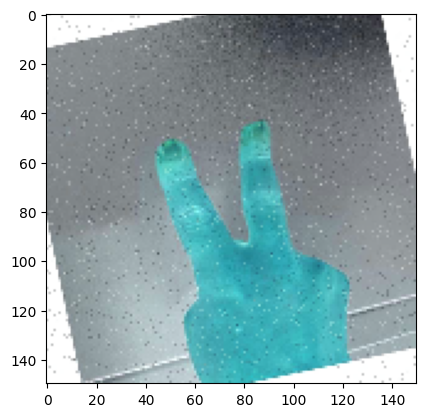

In [18]:
# Debugging the batches using conversion to Numpy arrays.
batches = tfds.as_numpy(dataset_train_augmented)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')

    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        # Break to shorten the output.
        break
    # Break to shorten the output.
    break

In [19]:
model = tf.keras.models.Sequential()

INPUT_IMG_SHAPE = (150, 150, 3)
# First convolution.
model.add(tf.keras.layers.Convolution2D(
    input_shape=INPUT_IMG_SHAPE,
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Second convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Third convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Fourth convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=128,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Flatten the results to feed into dense layers.
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

# 512 neuron dense layer.
model.add(tf.keras.layers.Dense(
    units=512,
    activation=tf.keras.activations.relu
))

# Output layer.
model.add(tf.keras.layers.Dense(
    units=NUM_CLASSES,
    activation=tf.keras.activations.softmax
))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


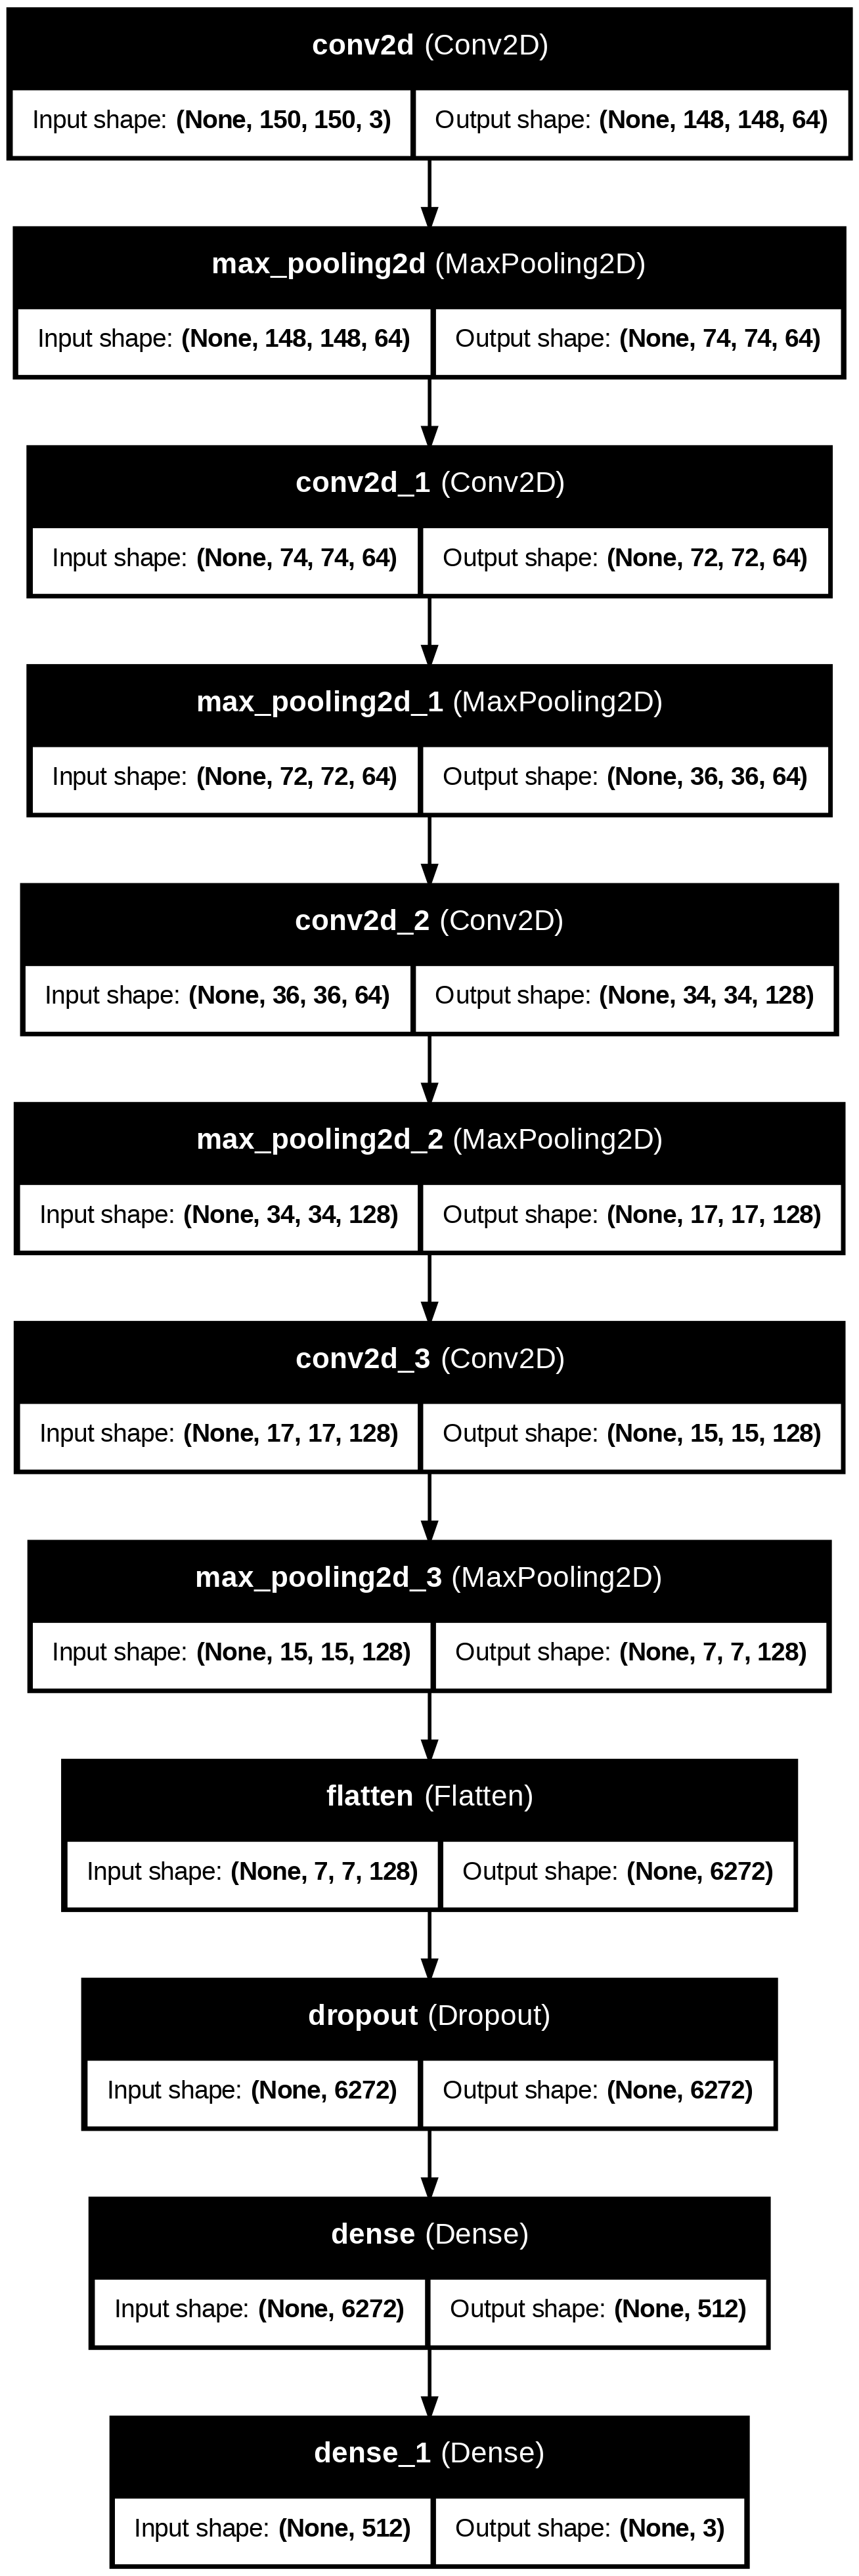

In [20]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [21]:
# adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop_optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(
    optimizer=rmsprop_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [22]:
steps_per_epoch = NUM_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUM_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 37
validation_steps: 2


In [23]:
!rm -rf tmp/checkpoints
!rm -rf logs

In [201]:
# Preparing callbacks.
os.makedirs('logs/fit', exist_ok=True)
tensorboard_log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1
)

os.makedirs('tmp/checkpoints', exist_ok=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='val_accuracy'
    # monitor='val_loss'
)

In [24]:
for image_batch, label_batch in dataset_train_augmented.take(1):
    print(f"Image batch shape: {image_batch.shape}")
    print(f"Label batch shape: {label_batch.shape}")


Image batch shape: (32, 150, 150, 3)
Label batch shape: (32,)


In [25]:
def preprocess_image(image):
    image = tf.image.resize(image, [150, 150])  # Resize to expected shape
    image = tf.cast(image, tf.float32)  # Ensure type consistency
    return image

dataset_train_augmented2 = dataset_train.map(lambda x, y: (preprocess_image(x), y))


In [27]:
training_history = model.fit(
    x=dataset_train_augmented2.repeat(),
    validation_data=dataset_test.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        # early_stopping_callback,
    ],
    verbose=1
)

Epoch 1/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 130ms/step - accuracy: 0.3251 - loss: 1.1853 - val_accuracy: 0.3438 - val_loss: 1.1025
Epoch 2/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.3337 - loss: 1.0992 - val_accuracy: 0.4118 - val_loss: 1.0964
Epoch 3/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.3365 - loss: 1.1003 - val_accuracy: 0.2059 - val_loss: 1.0999
Epoch 4/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.3301 - loss: 1.0996 - val_accuracy: 0.3594 - val_loss: 1.0994
Epoch 5/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.3455 - loss: 1.1001 - val_accuracy: 0.3235 - val_loss: 1.0973
Epoch 6/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3265 - loss: 1.1001 - val_accuracy: 0.3235 - val_loss: 1.1009
Epoch 7/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.3507 - loss: 1.0970 - val_accuracy: 0.3750 - val_loss: 1.0873
Epoch 8/15
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.4230 - loss: 1.0871 - val_accuracy: 0.4118 

In [28]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

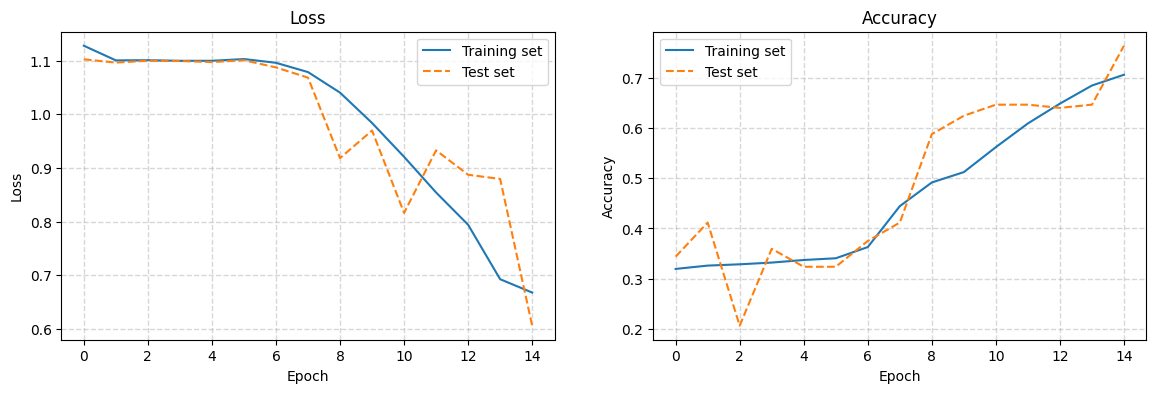

In [29]:
render_training_history(training_history)

In [31]:
training_history = model.fit(
    x=dataset_train_augmented2.repeat(),
    validation_data=dataset_test.repeat(),
    epochs=2,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[
        # model_checkpoint_callback,
        # early_stopping_callback,
    ],
    verbose=1
)

Epoch 1/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8831 - loss: 0.3039 - val_accuracy: 0.7031 - val_loss: 0.8496
Epoch 2/2
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.9301 - loss: 0.2286 - val_accuracy: 0.6765 - val_loss: 1.3621


In [34]:
# %%capture
train_loss, train_accuracy = model.evaluate(
    x=dataset_train_augmented2
)

dataset_test_augmented2 = dataset_test.map(lambda x, y: (preprocess_image(x), y))

test_loss, test_accuracy = model.evaluate(
    x=dataset_test_augmented2
)

print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)
print('\n')
print('Test loss: ', test_loss)
print('Test accuracy: ', test_accuracy)

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.9876 - loss: 0.0723
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7733 - loss: 0.7674
Training loss:  0.07433819025754929
Training accuracy:  0.9832636117935181


Test loss:  0.7396278977394104
Test accuracy:  0.7575757503509521


In [35]:
model_name = 'rock_paper_scissors_cnn.h5'
model.save(model_name, save_format='h5')